In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
    import numpy as np

    # Load training data
    X_train = np.loadtxt("D:\\intern\\image classification using cnn keras\\input.csv", delimiter=',')
    Y_train = np.loadtxt("D:\\intern\\image classification using cnn keras\\labels.csv", delimiter=',')

    # Load testing data
    X_test = np.loadtxt("D:\\intern\\image classification using cnn keras\\input_test.csv", delimiter=',')
    Y_test = np.loadtxt("D:\\intern\\image classification using cnn keras\\labels_test.csv", delimiter=',')

In [3]:
import numpy as np

# Reshape training data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

# Reshape testing data
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


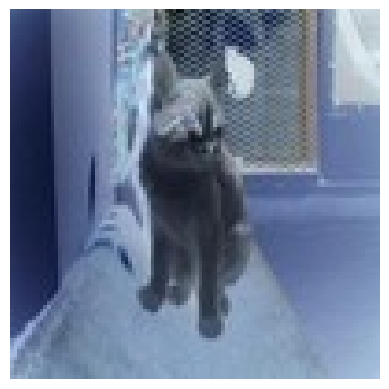

In [5]:
idx = random.randint(0, len(X_train) - 1)

# Check the data type and scale accordingly
if X_train[idx].dtype == np.float32 or X_train[idx].dtype == np.float64:
    # Scale from [0, 1] to [0, 255] and convert to uint8
    image = (X_train[idx] * 255).astype(np.uint8)
else:
    # Assume it's already in [0, 255] range and of type uint8
    image = X_train[idx]

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Hide axes for better visualization
plt.show()

In [6]:
## model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Input(shape=(100, 100, 3)),  # Define input shape using Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Final layer for binary classification
])

# Optional: Print model summary to verify architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Add the Input layer first
model.add(Input(shape=(100, 100, 3)))

# Then add the Conv2D layers
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5115 - loss: 76.6037
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6134 - loss: 0.6540
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7379 - loss: 0.5010
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8472 - loss: 0.3491
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8900 - loss: 0.2235


In [12]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5615 - loss: 1.2358


[1.2034268379211426, 0.5600000023841858]

making prediction


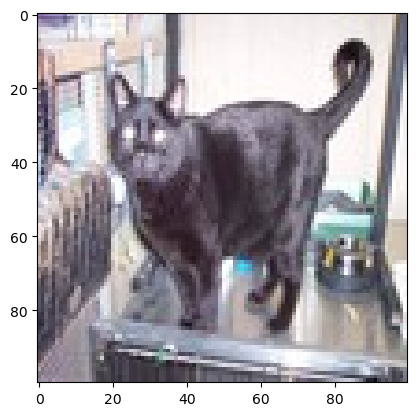

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
our model says it is a : cat


In [13]:
import random
import matplotlib.pyplot as plt

# Select a random index for testing
idx2 = random.randint(0, len(Y_test))

# Display the test image
plt.imshow(X_test[idx2, :]/255.0)  # Scale the image if necessary
plt.show()

# Make predictions
Y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
Y_pred = Y_pred > 0.5

if(Y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("our model says it is a :",pred)



In [17]:
# Save the trained model
model.save("D:\\intern\\image_classification_model.keras")


REAL TIME ANALYSIS 

In [14]:
!pip install opencv-python
!pip install tensorflow

Capturing image...
Press 'c' to capture an image and 'q' to quit.
Photo captured: photo.jpg


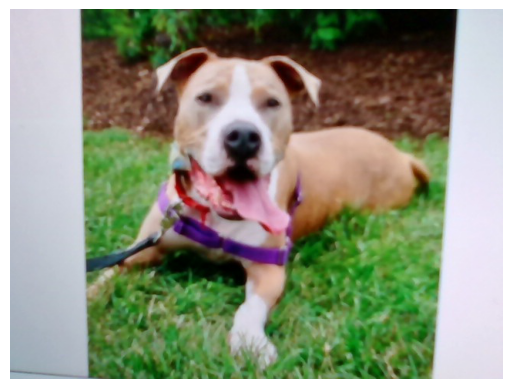

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted object: American_Staffordshire_terrier, Confidence: 35.78%
Capturing image...
Press 'c' to capture an image and 'q' to quit.
Photo captured: photo.jpg


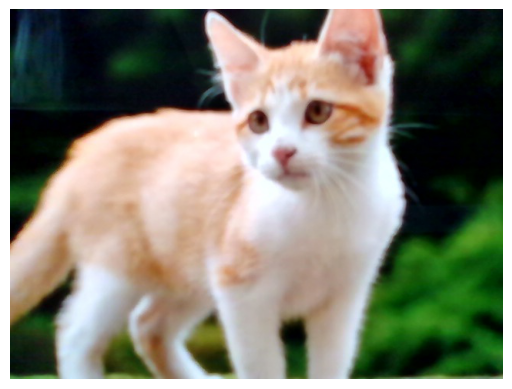

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted object: Egyptian_cat, Confidence: 42.32%
Capturing image...
Press 'c' to capture an image and 'q' to quit.
Photo captured: photo.jpg


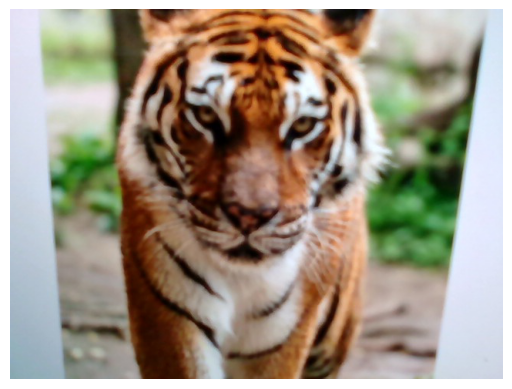

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted object: tiger, Confidence: 67.70%
Capturing image...
Press 'c' to capture an image and 'q' to quit.
Photo captured: photo.jpg


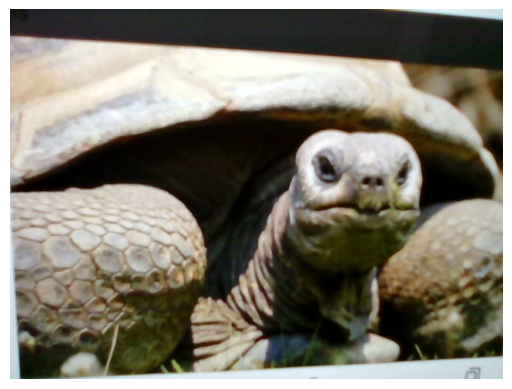

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted object: sidewinder, Confidence: 13.83%
Capturing image...
Press 'c' to capture an image and 'q' to quit.
Photo captured: photo.jpg


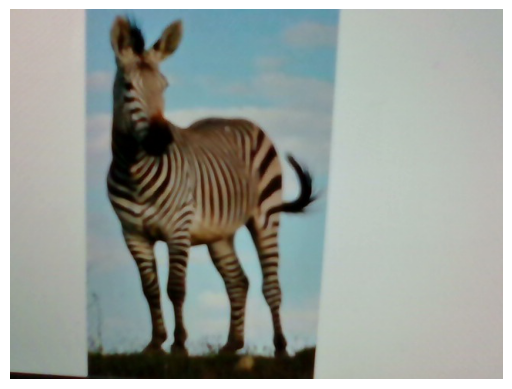

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted object: zebra, Confidence: 91.68%
Capturing image...
Press 'c' to capture an image and 'q' to quit.
Photo captured: photo.jpg


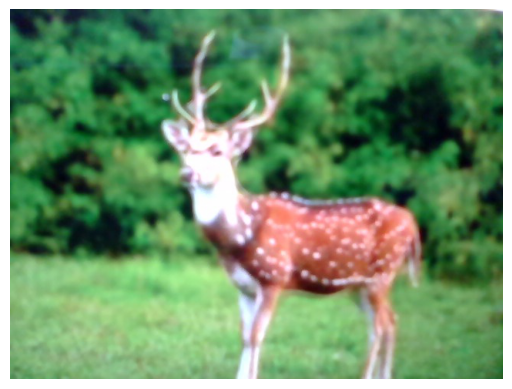

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted object: gazelle, Confidence: 15.48%
Capturing image...
Press 'c' to capture an image and 'q' to quit.
Exiting.
Error: cannot access local variable 'photo_filename' where it is not associated with a value


In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained MobileNetV2 model
model = tf.keras.applications.mobilenet_v2.MobileNetV2()

# Function to capture photo using the webcam
def take_photo():
    # Start capturing video from the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None

    print("Press 'c' to capture an image and 'q' to quit.")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break
        
        cv2.imshow('Webcam', frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):  # Capture the image when 'c' is pressed
            photo_filename = 'photo.jpg'
            cv2.imwrite(photo_filename, frame)
            print(f"Photo captured: {photo_filename}")
            break
        elif key == ord('q'):  # Quit if 'q' is pressed
            print("Exiting.")
            break

    cap.release()
    cv2.destroyAllWindows()
    return photo_filename

# Function to preprocess the image and make predictions
def preprocess_and_predict(img_path):
    # Load the image
    img = Image.open(img_path)

    # Resize and preprocess the image for MobileNetV2
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    final_image = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(final_image)

    # Decode and display prediction results
    results = imagenet_utils.decode_predictions(predictions)
    return results

# Function to continuously capture images and make predictions
def continuous_prediction():
    try:
        while True:
            print("Capturing image...")
            # Capture an image from the webcam
            filename = take_photo()
            if filename is None:
                break

            # Show captured image
            img = Image.open(filename)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # Preprocess and predict
            results = preprocess_and_predict(filename)
            print(f"Predicted object: {results[0][0][1]}, Confidence: {results[0][0][2] * 100:.2f}%")

            # Ask to continue or break loop
            cont = input("Press Enter to capture another image, or 'q' to quit: ").strip().lower()
            if cont == 'q':
                break
    except Exception as e:
        print(f"Error: {str(e)}")

# Call the continuous prediction function
continuous_prediction()

